In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Trips_2018.csv')

In [3]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [4]:
#formatting the date to fit our data
test = df
test['starttime'] = pd.to_datetime(test['starttime'], format='%Y-%m-%d %H:%M:%S.%f')
test['stoptime'] = pd.to_datetime(test['stoptime'], format='%Y-%m-%d %H:%M:%S.%f')

In [5]:
#Removing null
df.isna().sum()

Unnamed: 0                    0
tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
usertype                      0
birth_year                    0
gender                        0
dtype: int64

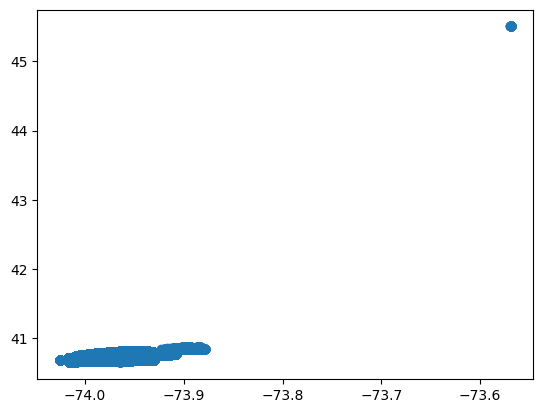

In [6]:
#Showcasing the outliers for start station 
plt.scatter(test['start_station_longitude'], test['start_station_latitude'])

Remove the outlier

In [7]:
#Removing outliers for end station and start station
test.drop(test.loc[test['end_station_longitude'] > -73.8].index, inplace=True)
test.drop(test.loc[test['start_station_longitude'] > -73.8].index, inplace=True)
test.drop(test.loc[test['end_station_latitude'] > 43].index, inplace=True)
test.drop(test.loc[test['start_station_latitude'] > 43].index, inplace=True)
test.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


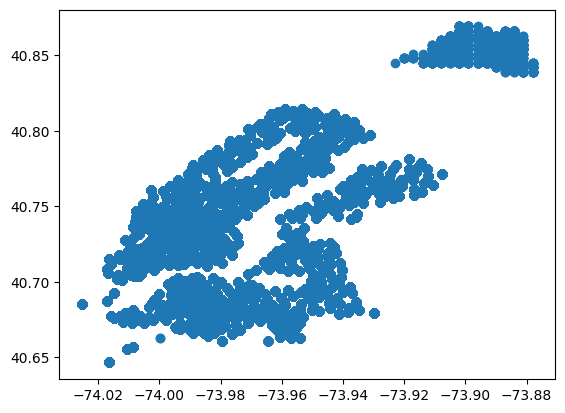

In [8]:
#New data with out outliers
plt.scatter(test['start_station_longitude'], test['start_station_latitude'])

In [9]:
#Initialising KMeans
K = 20
k = KMeans(K)

In [10]:
test2 = test[['start_station_longitude', 'start_station_latitude']].copy()

In [11]:
#Applying kmeans on start station
k.fit(test2)

c:\Users\YAF\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=20)

In [12]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(k.labels_))
colors=list(mcolors.CSS4_COLORS.keys()) 
cluster_colors=random.choices(colors, k=num_colors)
x_points = np.array(test['start_station_longitude'])
y_points = np.array(test['start_station_latitude'])

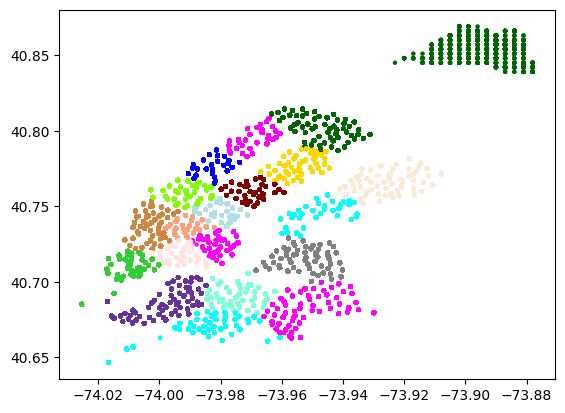

In [13]:
x_=[]
y_=[]
c_=[]
for label, x, y in zip(k.labels_, x_points, y_points):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
#plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=5,c=c_)

In [14]:
test2['Cluster_ID'] = k.labels_
print(test2['Cluster_ID'].unique())

[ 1  3 18 14 11 10  0 17  7 16  8  5  9 13 15 12  2  4 19  6]


In [15]:
Clusters = np.zeros(18)
for n in range(18):
    Clusters[n] = len(test2[test2.Cluster_ID == n])

In [16]:
print(Clusters)

[1068434. 1634115.  566019. 1245418.  454259. 1159148.  265114. 1058242.
 1480344.  854022.  819222. 1023118.  758955.  904689.  392578.  273740.
 1350733. 1125716.]


In [17]:
test3 = test2
test3['starttime'] = test['starttime']
test3['end_station_latitude'] = test['end_station_latitude']
test3['end_station_longitude'] = test['end_station_longitude']
test3 = test3.drop(test3[(test3.Cluster_ID == 0) | (test3.Cluster_ID == 2) | (test3.Cluster_ID == 3) | (test3.Cluster_ID == 4) | (test3.Cluster_ID == 5) | (test3.Cluster_ID == 6) | (test3.Cluster_ID == 7) | (test3.Cluster_ID == 8) | (test3.Cluster_ID == 9) | (test3.Cluster_ID == 13) | (test3.Cluster_ID == 14) | (test3.Cluster_ID == 15) | (test3.Cluster_ID == 16)].index)
test3.head()

,start_station_longitude,start_station_latitude,Cluster_ID,starttime,end_station_latitude,end_station_longitude
0,-73.993929,40.767272,1,2018-01-01 13:50:57.434,40.749013,-73.988484
1,-73.993929,40.767272,1,2018-01-01 15:33:30.182,40.750585,-73.994685
2,-73.993929,40.767272,1,2018-01-01 15:39:18.337,40.755942,-74.002116
3,-73.993929,40.767272,1,2018-01-01 15:40:13.372,40.763707,-73.985162
4,-73.993929,40.767272,1,2018-01-01 18:14:51.568,40.774667,-73.984706


In [18]:
print(test3['Cluster_ID'].unique())

[ 1 18 11 10 17 12 19]


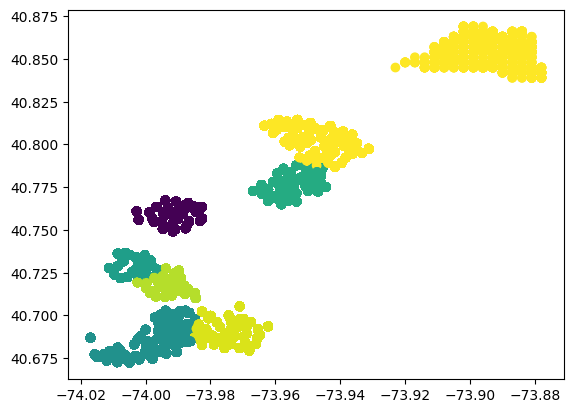

In [19]:
Col = test3['Cluster_ID']
for i in Col:
    if Col[i] == 10:
        'b'
    elif Col[i] == 11:
        'g'
    elif Col[i] == 12:
        'r'
    elif Col[i] == 17:
        'c'
    elif Col[i] == 1:
        'm'
plt.scatter(test3['start_station_longitude'], test3['start_station_latitude'], c=Col)

Prediction challenge:
1. The cluster with the largest demand will be selected.
2. We will apply a linear regression model initialy and take from there.
3. We are planning on using cross-validation method to benchmark and validate our training set

Exploratory component:
Our initial idea is to investigate the following: "How can we predict and optimize bike availability at each station to meet demand patterns throughout the day and week, while accounting for holidays?"
This will be done by adding a new attribute which will specify when holdidays occur throughout a year.
